In [1]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
# plt.rcParams["font.family"] = "Times New Roman"

In [2]:
# get wordfreq quantile
with open('simu4_data/simu4_word_freq.pkl', 'rb') as inp:
    df = pickle.load(inp)
df

,item,itemno_old,itemno,freq,quantile
0,ABDOMEN,1,1,110,2
1,ACROBAT,4,2,17,0
2,ADULT,8,3,906,8
3,ALLEY,15,4,165,3
4,ALLIGATOR,16,5,12,0
...,...,...,...,...,...
979,YOKE,1632,980,12,0
980,YOLK,1633,981,47,1
981,YOUTH,1634,982,1159,8
982,ZIPPER,1636,983,24,0


In [3]:
# s_mat = np.load('../Data/simu4_smat_lsa.npy')
s_mat = np.load('simu4_data/simu4_smat.npy')

In [4]:
# freq_order = df.sort_values(by="freq")['itemno'].to_numpy()

# n = len(df)
# smat_order = np.zeros((n,n))
# for i in range(n):
#     for j in range(n):
#         a = s_mat[freq_order[i],freq_order[j]]
#         if not np.isnan(a):
#             smat_order[i,j] = a
#         else:
#             smat_order[i,j] = 0

# smat_order

# plt.subplots(figsize=(20,20))
# sns.heatmap(smat_order,vmax = 0.5, vmin = 0, cmap = 'Reds')
# plt.xlabel('freq order')
# plt.ylabel('freq order')
# plt.title("association matrix of words in freq order")
# # plt.savefig('fig/simu4_smat.pdf')
# plt.show()

# df.groupby("quantile").count()

# np.mean(smat_order[:,0:100])

# np.mean(smat_order[:,-100:-1])

In [5]:
s_mat_dia = s_mat.copy()
np.fill_diagonal(s_mat_dia, 0)
df["s_mean"] = np.mean(s_mat_dia,axis=1)
df["log_freq"] = np.log(df["freq"])
df

,item,itemno_old,itemno,freq,quantile,s_mean,log_freq
0,ABDOMEN,1,1,110,2,0.120583,4.700480
1,ACROBAT,4,2,17,0,0.077693,2.833213
2,ADULT,8,3,906,8,0.089693,6.809039
3,ALLEY,15,4,165,3,0.115357,5.105946
4,ALLIGATOR,16,5,12,0,0.147916,2.484907
...,...,...,...,...,...,...,...
979,YOKE,1632,980,12,0,0.104083,2.484907
980,YOLK,1633,981,47,1,0.139488,3.850148
981,YOUTH,1634,982,1159,8,0.068605,7.055313
982,ZIPPER,1636,983,24,0,0.131708,3.178054


In [6]:
model = smf.ols(formula='s_mean ~ log_freq', data=df).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 s_mean   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     61.16
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           1.35e-14
Time:                        00:04:05   Log-Likelihood:                 2147.9
No. Observations:                 984   AIC:                            -4292.
Df Residuals:                     982   BIC:                            -4282.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1327      0.003     39.789      0.000       0.126       0.139
log_freq      -0.0046      0.001     -7.821      0.000      -0.006      -0.003
==============================================================================
Omnibus:                       16.084   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.423
Skew:                          -0.146   Prob(JB):                      0.00331
Kurtosis:                       2.561   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

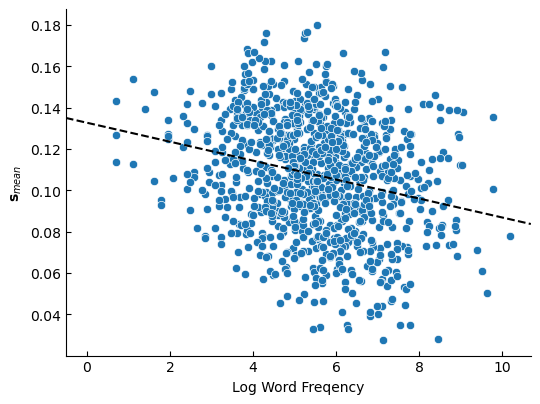

In [7]:
fig, ax = plt.subplots(figsize=(6,4.5))

sns.scatterplot(data=df, x='log_freq', y='s_mean')

b0 = model.params[0]
b1 = model.params[1]

ax.axline((0, b0), slope=b1, color='k', linestyle='--')

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

plt.ylabel('$\mathbf{s}_{mean}$')
plt.xlabel('Log Word Freqency')

plt.savefig('simu4_fig/simu4_freq_sem.pdf')
plt.show()

In [8]:
model1 = smf.ols(formula='log_freq ~ s_mean', data=df).fit() 
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               log_freq   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     61.16
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           1.35e-14
Time:                        00:04:06   Log-Likelihood:                -1755.2
No. Observations:                 984   AIC:                             3514.
Df Residuals:                     982   BIC:                             3524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8657      0.182     37.787      0.0

In [9]:
# model-predicted word freq

with open("simu4_data/simu4_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)

params = cmr.make_default_params()
params.update(
    beta_enc = 0.4,
    beta_rec = 0.1,
    beta_rec_post = 0.2,
    gamma_fc = 0.1,
    s_fc = 0,
    c_thresh = 0.18,
    a = 2800,
    b = 2.14,
    m = 0,
    n = 1,
)

df_thin = df_test[['session','itemno']]
df_thin = df_thin.assign(s_resp=np.nan, s_rt=np.nan, csim=np.nan)

# extarct the session data
sess = 0
pres_mat = df_study.loc[df_study.session==sess,'itemno'].to_numpy()
pres_mat = np.reshape(pres_mat,(1, len(pres_mat)))
cue_mat = df_thin.loc[df_thin.session==sess,'itemno'].to_numpy()
sem_mat = s_mat

model = cmr.CMR2(params, pres_mat, sem_mat, source_mat=None,
           rec_mat=None, ffr_mat=None, cue_mat=cue_mat, task='Recog', mode='Final')

In [10]:
df['cal_word_freq'] = model.cal_word_freq
df

,item,itemno_old,itemno,freq,quantile,s_mean,log_freq,cal_word_freq
0,ABDOMEN,1,1,110,2,0.120583,4.700480,202.549667
1,ACROBAT,4,2,17,0,0.077693,2.833213,350.499329
2,ADULT,8,3,906,8,0.089693,6.809039,300.642303
3,ALLEY,15,4,165,3,0.115357,5.105946,216.544220
4,ALLIGATOR,16,5,12,0,0.147916,2.484907,142.809921
...,...,...,...,...,...,...,...,...
979,YOKE,1632,980,12,0,0.104083,2.484907,250.119720
980,YOLK,1633,981,47,1,0.139488,3.850148,159.057434
981,YOUTH,1634,982,1159,8,0.068605,7.055313,393.682587
982,ZIPPER,1636,983,24,0,0.131708,3.178054,175.692947


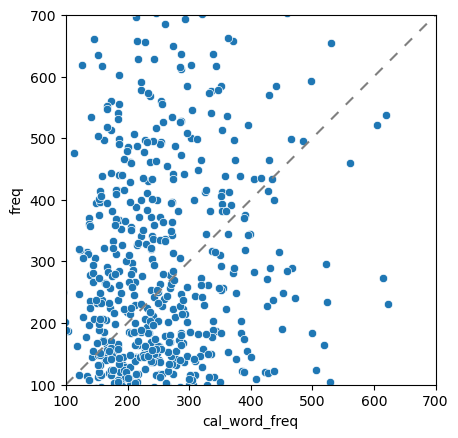

In [11]:
sns.scatterplot(data=df, x='cal_word_freq', y='freq')
plt.axis('square')
plt.ylim([100,700])
plt.xlim([100,700])
plt.axline((0, 0), slope=1, color="grey", linestyle=(0, (5, 5)))
# plt.savefig('fig/simu4_predfreq.pdf')
plt.show()